<a href="https://colab.research.google.com/github/karencfisher/COVID19/blob/main/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.python.keras.utils.version_utils import TensorBoardVersionSelector
import pandas as pd
import numpy as np
import re
import datetime
import nltk
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

In [69]:
from google.colab import drive
drive.mount('/content/drive')

df_reviews = pd.read_csv('/content/drive/MyDrive/hotel_reviews/reviews.csv')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Drop date and reviewID columns
df_reviews.drop(columns=['Date', 'ReviewID'], inplace=True)

# Add column for average score (averaging ratings for each review)
cols = df_reviews.columns[:7]
df_reviews['average_score'] = df_reviews[cols].mean(axis=1)

# Drop individual category ratings
df_reviews.drop(columns=cols, inplace=True)

In [71]:
df_reviews.head()

,Title,Content,average_score
0,“Super stay.”,This the second time we have stayed and this t...,5.000000
1,“Permanent improvements in various aereas to b...,My experience as a rare but regular guest with...,4.571429
2,“span pacific orchard”,Great hotel in good location for night life & ...,4.571429
3,“Great value for money in heart of the shoppin...,The Pan Pac Orchard is in a great location rig...,4.714286
4,“Pan Pacific Orchard”,"Stayed for 3 nights. Hotel is clean, tasty foo...",4.571429


### Distrubution of average scores

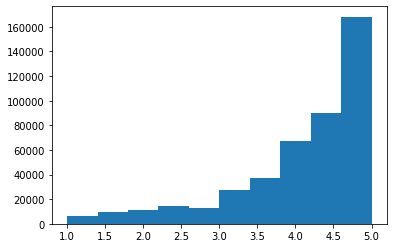

In [73]:
plt.hist(df_reviews['average_score'], bins=10);

### Sample titles and descriptions by average score

In [80]:
import textwrap

wrapper = textwrap.TextWrapper(width=140)
for i in range(1, 6):
  print(f'Average Score: {i}')
  cond = df_reviews['average_score'].astype(int) == i
  df_sample = df_reviews[cond].sample(10).sort_values(by='average_score')
  for row in range(len(df_sample)):
    print(df_sample.iloc[row]['Title'], '\n', f'Score = {df_sample.iloc[row]["average_score"]: .2f}')
    text = wrapper.wrap(df_sample.iloc[row]['Content'])
    for w in text:
      print(w)
    print('\n')
  print('*************\n')

Average Score: 1
“Dont stay here” 
 Score =  1.00
This is a horrible hotel.Find somewhere else to stay.The staff is terrible the restaurant is overpriced and they charge you for amenities
whether you plan to use them or not.Who wants to use a weight room on vacation.I emplore you do not stay here you will regret it.Make this a
last resort hotel only if nothing else is available.


“THE TRUTH” 
 Score =  1.00
Upon arrival..... sheer disappointment, even the shabby outside sign couldnt prepare us for what was ahead. However upon entry we were
plesantly surprised with the rustique tables, wooden floors and general ambiance. We arrived a few hours before checking and so wanted to
sore our suitcases. After being issued with the fence post key, my friend kindly took my suitase (being a fine blonde) down the stairs of
death and into the dungeon basement, ignoring the suspicious smells. Having stored our luggage we went out to enjoy the pleasures of the
city. We returned to check in and were i

### Bucketize reviews into two sentiments, Good vs. Bad

Threshold = average score 3.5

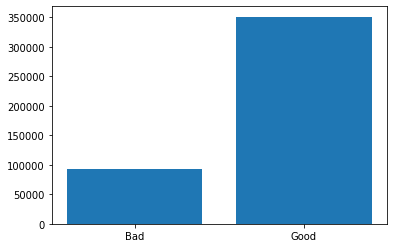

In [75]:
df_reviews['sentiment'] = df_reviews['average_score'].apply(lambda x: 1 if x >= 3.5 else 0)
plt.bar(['Bad', 'Good'], df_reviews['sentiment'].value_counts().sort_index());